In [21]:
from chrecog.predict import get_session, load_ckpt, cnn_2_reduce, X, keep_prob, get_pred_one, get_candidate
from data.gen import fonts, weights, get_mat, slice_img
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['image.cmap'] = 'Greys'

In [2]:
sess = get_session()
load_ckpt(sess, "data/ckpt/161103_2ID.ckpt")

ckpt loaded from data/ckpt/161103_2ID.ckpt


In [27]:
def generate_img(chs):
    return np.array([1 - slice_img(get_mat(ch))/255 for ch in chs])

.
J
"
!
앞


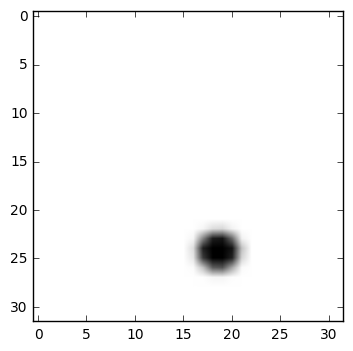

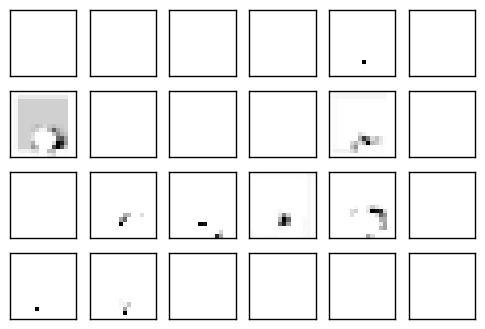

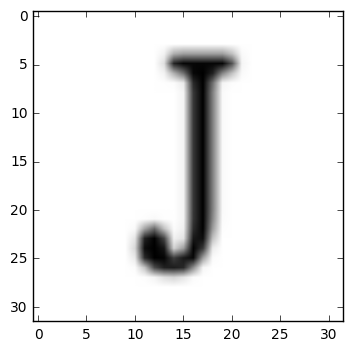

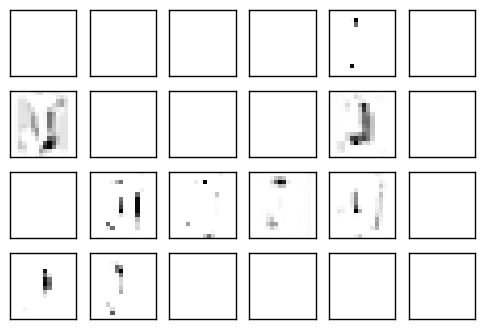

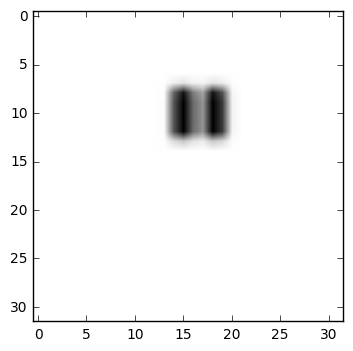

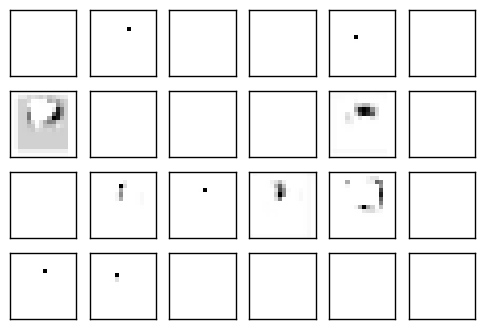

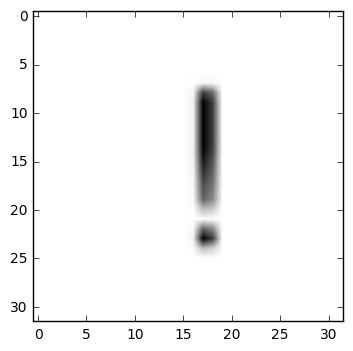

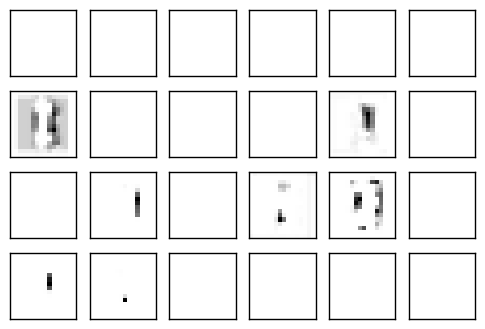

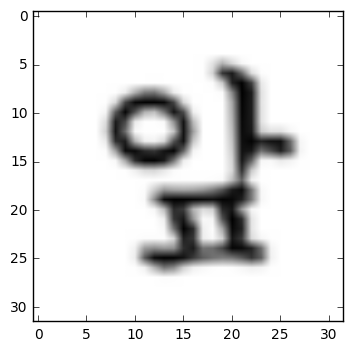

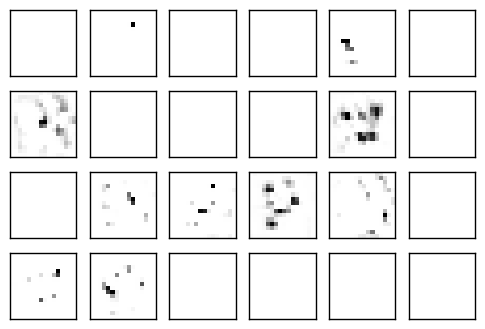

In [32]:
testimg = generate_img(('.', 'J', '"', '!', '앞'))
cnnimg = sess.run(cnn_2_reduce, feed_dict={X:testimg, keep_prob:1})
for k in range(testimg.shape[0]):
    pred = get_pred_one(testimg[k])
    value = get_candidate(pred)
    print(value)
    plt.figure()
    plt.imshow(testimg[k])
    plt.figure()
    for i in range(24):
        plt.subplot(4, 6, i + 1)
        plt.xticks(())
        plt.yticks(())
        plt.imshow(np.squeeze(cnnimg[k][:,:,i]), interpolation="none")
#print(cnnimg.shape)
#print(cnnimg_s.shape)
#plt.figure()
#plt.imshow(cnnimg_s, interpolation="none")